In [2]:
import numpy as np
import pyflux as pf
import pandas as pd
from pandas_datareader import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
from pyflux.results import transformer
%matplotlib inline

plt.style.use('dark_background')


# vech

In [71]:
data = pd.read_excel('data.xlsx')
data.head()

,Date,NVS,PFIZER,SANOFI,Merck,JOHNSON,BAYER,EUROFINS,GUERBET,SARTORIUS,VETOQUINOL,LNA,BASTIDE,CELYAD,Nanobiotix,AB,RAMSAY,INNATE,BONE
0,2010-11-01,-0.007420,0.011481,-0.002563,-0.001652,-0.000784,0.000933,-0.004494,0.017532,0.000606,0.014445,0.010989,0.001078,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-11-02,0.013213,-0.009648,0.015991,0.009931,0.002983,0.017710,-0.018059,-0.017230,0.001213,-0.020712,-0.001359,0.024758,NaN,NaN,0.003141,0.018836,0.006623,NaN
2,2010-11-03,0.005834,0.008023,-0.003092,-0.002732,0.004853,0.008766,-0.000230,-0.021818,-0.001211,-0.003635,-0.004762,-0.002101,NaN,NaN,-0.003132,-0.019816,0.000000,NaN
3,2010-11-04,0.007335,-0.011939,0.023682,0.003835,0.008880,0.025032,0.011957,0.000531,0.003031,-0.001658,-0.004785,0.005263,NaN,NaN,-0.001047,0.007640,0.026316,NaN
4,2010-11-05,-0.007113,-0.011507,-0.011842,-0.025921,-0.001699,-0.009237,0.007271,-0.002256,0.000906,0.013289,0.013049,-0.004188,NaN,NaN,-0.015723,-0.001336,-0.006410,NaN


In [76]:
data.describe()

,NVS,PFIZER,SANOFI,Merck,JOHNSON,BAYER,EUROFINS,GUERBET,SARTORIUS,VETOQUINOL,LNA,BASTIDE,CELYAD,Nanobiotix,AB,RAMSAY,INNATE,BONE
count,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2234.000000,2234.000000,2236.000000,2238.000000,2238.000000,1492.000000,1739.000000,2235.000000,2237.000000,2237.000000,996.000000
mean,0.000292,0.000406,0.000230,0.000439,0.000362,0.000154,0.001240,0.000712,0.001589,0.000393,0.000631,0.000784,0.000090,0.000611,0.000252,0.000376,0.001233,-0.001305
std,0.011098,0.011504,0.014523,0.012184,0.009637,0.018040,0.019941,0.023213,0.018156,0.014648,0.014489,0.017597,0.037690,0.039233,0.037613,0.016781,0.037235,0.028760
min,-0.055203,-0.064174,-0.089928,-0.066218,-0.100379,-0.112824,-0.102285,-0.177305,-0.125191,-0.101307,-0.061706,-0.085142,-0.404180,-0.299611,-0.323115,-0.145380,-0.400681,-0.275701
25%,-0.005501,-0.005523,-0.007735,-0.005991,-0.004238,-0.009226,-0.009062,-0.009985,-0.008358,-0.006252,-0.006522,-0.008412,-0.017458,-0.012844,-0.015429,-0.006897,-0.015525,-0.011993
50%,0.000579,0.000297,0.000268,0.000459,0.000307,0.000443,0.000875,0.000000,0.001054,0.000000,0.000000,0.000000,-0.002467,-0.001643,-0.002463,0.000000,0.000000,-0.001042
75%,0.006261,0.006325,0.008684,0.007043,0.005595,0.009501,0.011139,0.011223,0.010841,0.006820,0.007489,0.009315,0.015206,0.009312,0.010166,0.007799,0.013423,0.009232
max,0.056600,0.070667,0.058159,0.104080,0.053821,0.102511,0.106094,0.208295,0.152027,0.104348,0.110647,0.116643,0.261830,0.795276,0.715210,0.094966,0.496241,0.198986


In [44]:
returns = transformer(data, 'vech')

Text(0.5, 1.0, 'markReturns')

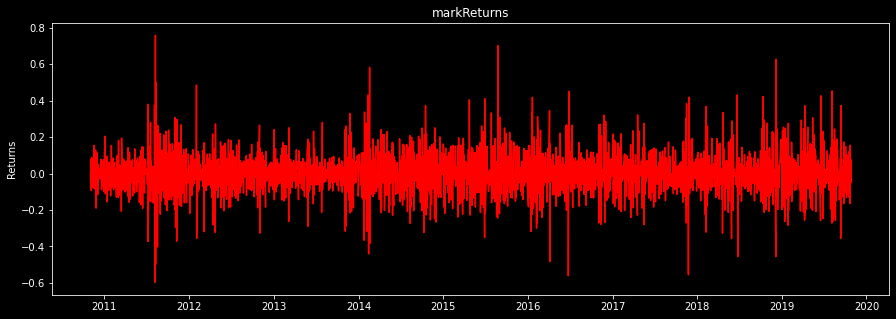

In [45]:

plt.figure(figsize=(15,5));
plt.plot(returns.index,returns, color='r')
plt.ylabel('Returns')
plt.title('markReturns')

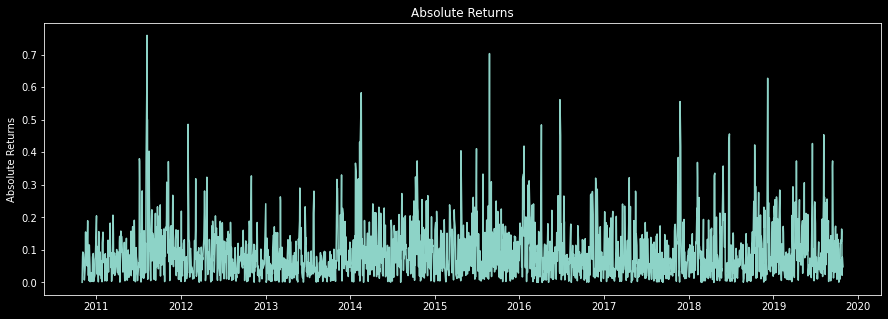

In [46]:
plt.figure(figsize=(15,5))
plt.plot(returns.index, np.abs(returns))
plt.ylabel('Absolute Returns')
plt.title('Absolute Returns');

In [47]:
model = pf.GARCH(returns, p=1, q=1)
x = model.fit()
x.summary()

GARCH(1,1)                                                                                                
======================================================= ==================================================
Dependent Variable: vech model                          Method: MLE                                       
Start Date: 2010-11-03 00:00:00                         Log Likelihood: 1674.0227                         
End Date: 2019-10-28 00:00:00                           AIC: -3340.0454                                   
Number of observations: 2236                            BIC: -3317.1956                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             0.0037                                                           
q(1)                                 

# garch

In [66]:
data = pd.read_excel('data.xlsx')
data.head()

,Date,NVS,PFIZER,SANOFI,Merck,JOHNSON,BAYER,EUROFINS,GUERBET,SARTORIUS,VETOQUINOL,LNA,BASTIDE,CELYAD,Nanobiotix,AB,RAMSAY,INNATE,BONE
0,2010-11-01,-0.007420,0.011481,-0.002563,-0.001652,-0.000784,0.000933,-0.004494,0.017532,0.000606,0.014445,0.010989,0.001078,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-11-02,0.013213,-0.009648,0.015991,0.009931,0.002983,0.017710,-0.018059,-0.017230,0.001213,-0.020712,-0.001359,0.024758,NaN,NaN,0.003141,0.018836,0.006623,NaN
2,2010-11-03,0.005834,0.008023,-0.003092,-0.002732,0.004853,0.008766,-0.000230,-0.021818,-0.001211,-0.003635,-0.004762,-0.002101,NaN,NaN,-0.003132,-0.019816,0.000000,NaN
3,2010-11-04,0.007335,-0.011939,0.023682,0.003835,0.008880,0.025032,0.011957,0.000531,0.003031,-0.001658,-0.004785,0.005263,NaN,NaN,-0.001047,0.007640,0.026316,NaN
4,2010-11-05,-0.007113,-0.011507,-0.011842,-0.025921,-0.001699,-0.009237,0.007271,-0.002256,0.000906,0.013289,0.013049,-0.004188,NaN,NaN,-0.015723,-0.001336,-0.006410,NaN


In [67]:
returns = transformer(data, 'garch')

Text(0, 0.5, 'Returns')

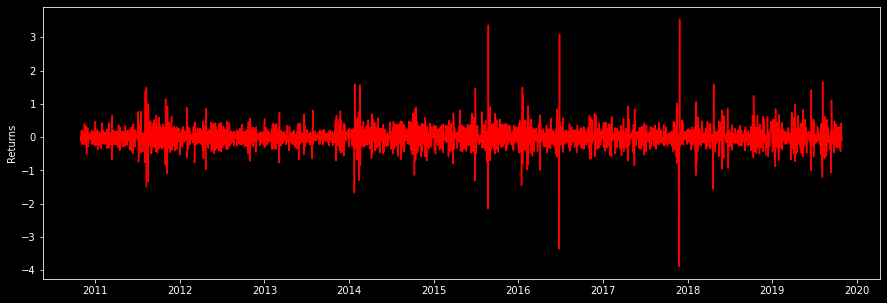

In [68]:

plt.figure(figsize=(15,5));
plt.plot(returns.index,returns, color='r')
plt.ylabel('Returns')

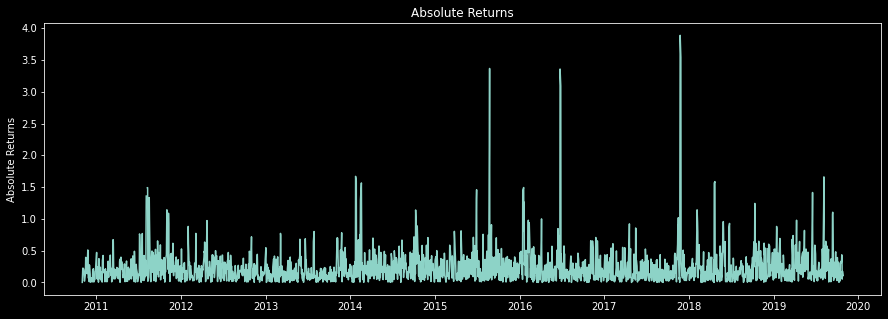

In [69]:
plt.figure(figsize=(15,5))
plt.plot(returns.index, np.abs(returns))
plt.ylabel('Absolute Returns')
plt.title('Absolute Returns');

In [70]:
model = pf.GARCH(returns, p=1, q=1)
x = model.fit()
x.summary()

GARCH(1,1)                                                                                                
======================================================= ==================================================
Dependent Variable: garch model                         Method: MLE                                       
Start Date: 2010-11-03 00:00:00                         Log Likelihood: nan                               
End Date: 2019-10-28 00:00:00                           AIC: nan                                          
Number of observations: 2236                            BIC: nan                                          
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             0.0009                                                           
q(1)                                 

# turbulence periods -- 2010/11/01    2013/12/31

In [3]:
import datetime
df = pd.read_excel('data.xlsx')
first_period = df[datetime.datetime(2010, 11, 1, 0, 0, 0) <= df.Date]
first_period= first_period[first_period.Date <= datetime.datetime(2013, 12, 31, 0, 0, 0)]
first_period = first_period[['Date', 'NVS', 'PFIZER']]
first_period

,Date,NVS,PFIZER
0,2010-11-01,-0.007420,0.011481
1,2010-11-02,0.013213,-0.009648
2,2010-11-03,0.005834,0.008023
3,2010-11-04,0.007335,-0.011939
4,2010-11-05,-0.007113,-0.011507
...,...,...,...
781,2013-12-23,0.004341,0.003306
782,2013-12-24,0.001526,-0.001977
783,2013-12-27,0.020437,0.011555
784,2013-12-30,-0.000622,0.001632


In [4]:
returns = transformer(first_period)


Text(0.5, 1.0, 'markReturns')

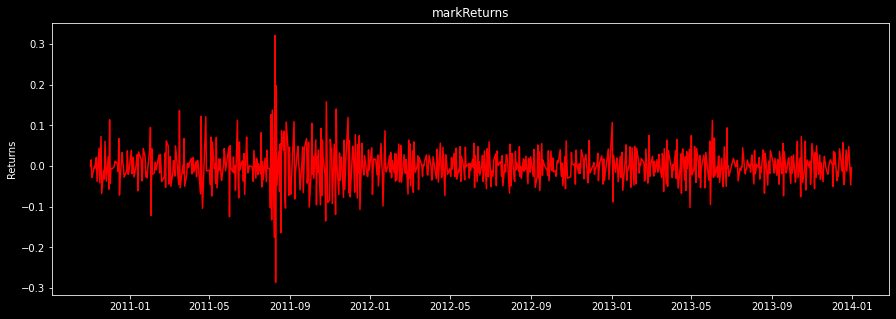

In [5]:

plt.figure(figsize=(15,5));
plt.plot(returns.index,returns, color='r')
plt.ylabel('Returns')
plt.title('markReturns')

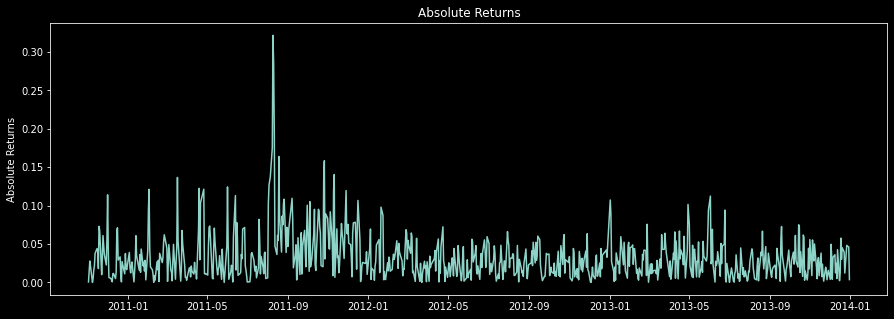

In [6]:
plt.figure(figsize=(15,5))
plt.plot(returns.index, np.abs(returns))
plt.ylabel('Absolute Returns')
plt.title('Absolute Returns');

In [7]:
model = pf.GARCH(returns, p=1, q=1)
x = model.fit()
x.summary()

GARCH(1,1)                                                                                                
======================================================= ==================================================
Dependent Variable: bekk model                          Method: MLE                                       
Start Date: 2010-11-03 00:00:00                         Log Likelihood: 1434.3167                         
End Date: 2013-12-31 00:00:00                           AIC: -2860.6334                                   
Number of observations: 784                             BIC: -2841.9757                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             0.0004                                                           
q(1)                                 

# turbulence periods --- 2014/01/02 2019/10/28


In [9]:
import datetime
df = pd.read_excel('data.xlsx')
first_period = df[datetime.datetime(2014, 1, 2, 0, 0, 0) <= df.Date]
first_period= first_period[first_period.Date <= datetime.datetime(2019, 10, 28, 0, 0, 0)]
first_period = first_period[['Date', 'NVS', 'PFIZER']]
first_period

,Date,NVS,PFIZER
786,2014-01-02,-0.020652,-0.005550
787,2014-01-03,0.004954,0.001970
788,2014-01-06,0.001011,0.000983
789,2014-01-07,0.003536,0.006219
790,2014-01-08,0.003020,0.006832
...,...,...,...
2233,2019-10-22,0.004737,-0.000823
2234,2019-10-23,-0.003909,0.009333
2235,2019-10-24,0.007041,-0.010335
2236,2019-10-25,0.000802,0.010442


In [10]:
returns = transformer(first_period)

Text(0.5, 1.0, 'markReturns')

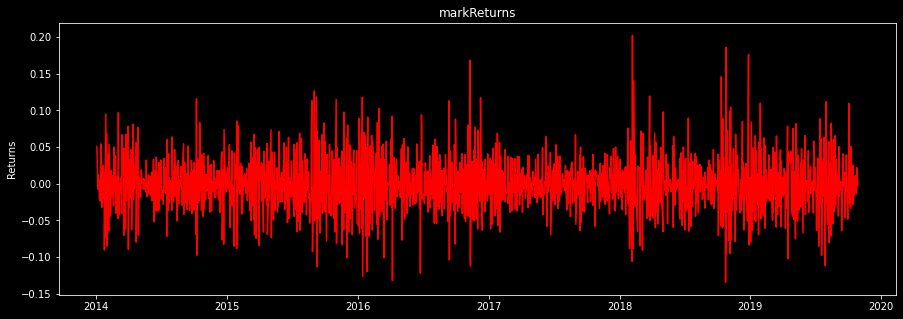

In [11]:

plt.figure(figsize=(15,5));
plt.plot(returns.index,returns, color='r')
plt.ylabel('Returns')
plt.title('markReturns')

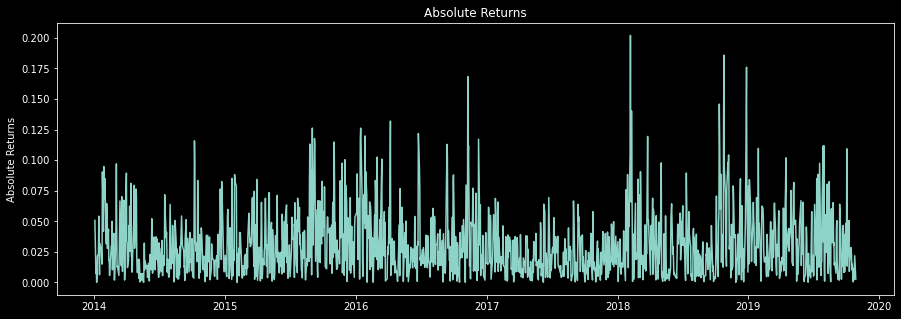

In [12]:
plt.figure(figsize=(15,5))
plt.plot(returns.index, np.abs(returns))
plt.ylabel('Absolute Returns')
plt.title('Absolute Returns');

In [13]:
model = pf.GARCH(returns, p=1, q=1)
x = model.fit()
x.summary()

GARCH(1,1)                                                                                                
======================================================= ==================================================
Dependent Variable: bekk model                          Method: MLE                                       
Start Date: 2014-01-06 00:00:00                         Log Likelihood: 2700.5253                         
End Date: 2019-10-28 00:00:00                           AIC: -5393.0506                                   
Number of observations: 1450                            BIC: -5371.9333                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             0.0002                                                           
q(1)                                 

In [14]:
print(model.latent_variables)

Index    Latent Variable           Prior           Prior Hyperparameters     V.I. Dist  Transform 
======== ========================= =============== ========================= ========== ==========
0        Vol Constant              Normal          mu0: 0, sigma0: 3         Normal     exp       
1        q(1)                      Normal          mu0: 0, sigma0: 0.5       Normal     logit     
2        p(1)                      Normal          mu0: 0, sigma0: 0.5       Normal     logit     
3        Returns Constant          Normal          mu0: 0, sigma0: 3         Normal     None      


# efficient portofolio 

In [99]:
data = pd.read_excel('data.xlsx')
data

,Date,NVS,PFIZER,SANOFI,Merck,JOHNSON,BAYER,EUROFINS,GUERBET,SARTORIUS,VETOQUINOL,LNA,BASTIDE,CELYAD,Nanobiotix,AB,RAMSAY,INNATE,BONE
0,2010-11-01,-0.007420,0.011481,-0.002563,-0.001652,-0.000784,0.000933,-0.004494,0.017532,0.000606,0.014445,0.010989,0.001078,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-11-02,0.013213,-0.009648,0.015991,0.009931,0.002983,0.017710,-0.018059,-0.017230,0.001213,-0.020712,-0.001359,0.024758,NaN,NaN,0.003141,0.018836,0.006623,NaN
2,2010-11-03,0.005834,0.008023,-0.003092,-0.002732,0.004853,0.008766,-0.000230,-0.021818,-0.001211,-0.003635,-0.004762,-0.002101,NaN,NaN,-0.003132,-0.019816,0.000000,NaN
3,2010-11-04,0.007335,-0.011939,0.023682,0.003835,0.008880,0.025032,0.011957,0.000531,0.003031,-0.001658,-0.004785,0.005263,NaN,NaN,-0.001047,0.007640,0.026316,NaN
4,2010-11-05,-0.007113,-0.011507,-0.011842,-0.025921,-0.001699,-0.009237,0.007271,-0.002256,0.000906,0.013289,0.013049,-0.004188,NaN,NaN,-0.015723,-0.001336,-0.006410,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,2019-10-22,0.004737,-0.000823,-0.013496,-0.038097,0.009217,-0.017496,0.007601,0.000000,-0.022455,0.000000,0.011555,0.000000,-0.078916,0.013699,-0.012658,0.000000,-0.024540,-0.023290
2234,2019-10-23,-0.003909,0.009333,0.009929,0.019311,0.005418,0.030607,0.007544,0.015119,-0.022205,0.000000,-0.019730,-0.007692,0.030691,-0.022258,-0.005128,0.005714,-0.020665,0.013413
2235,2019-10-24,0.007041,-0.010335,0.013328,-0.003499,-0.018476,0.006479,0.019186,0.005319,0.018794,0.000000,-0.009534,0.002584,0.012407,-0.015447,-0.007732,-0.022727,0.003670,0.010294
2236,2019-10-25,0.000802,0.010442,-0.000431,-0.003875,0.006667,-0.011803,0.013315,0.066667,0.006918,0.003610,-0.003209,0.011598,-0.011029,0.040462,0.023377,0.005814,-0.014625,-0.018923


,Date,NVS,SANOFI
0,2010-11-01,-0.007420,-0.002563
1,2010-11-02,0.013213,0.015991
2,2010-11-03,0.005834,-0.003092
3,2010-11-04,0.007335,0.023682
4,2010-11-05,-0.007113,-0.011842
...,...,...,...
287,2011-12-23,0.007255,0.007498
288,2011-12-27,0.002811,-0.003859
289,2011-12-28,-0.005431,-0.012452
290,2011-12-29,0.001233,0.021575


In [152]:
df.corr().to_dict()['NVS']['SANOFI']

0.7142687789610123

In [147]:
returns = df.mean().to_dict()
#returns
ecart_type = df.std().to_dict()
#ecart_type
R_f = 0.00001
rho_1_2 = df.corr().to_dict()['NVS']['SANOFI']
beta_ = 1

# optimize 

In [151]:
from scipy.optimize import minimize
from scipy.optimize import LinearConstraint


#Create initial point.

x0=[0.9,0.8]

#Create function to be minimized

def objective(x):
    alpha_1 = x[0]
    alpha_2 = x[1]
    max_ = alpha_1 * returns['NVS'] + alpha_2 * returns['SANOFI'] - R_f
    min_ = beta_ * (alpha_1 ** 2) * (ecart_type['NVS'] ** 2) + (alpha_2 ** 2) * (ecart_type['SANOFI'] ** 2) + 2 * alpha_1 * alpha_2 * ecart_type['NVS'] * ecart_type['SANOFI'] * rho_1_2
    return max_ - min_

A = np.array([1, 1]).reshape(1, 2)
lbnd = upbnd = 1
lin_cons=LinearConstraint(A,lbnd,upbnd)
sol=minimize(objective,x0,constraints=lin_cons)
print(sol)

fun: -7.036327331481066e-05
     jac: array([-0.00034837, -0.00024561])
 message: 'Optimization terminated successfully'
    nfev: 6
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.54998072, 0.45001928])


In [119]:
    year1 = int(year1)
    month1 = int(month1)
    day1 = int(day1)

array([[1, 2]])

In [279]:
def optimize(file, actif_1, actif_2, period_1, period_2):
    data = pd.read_excel(file)
    df = data[['Date', actif_1, actif_2]]
    year1, month1, day1 = period_1.split('-')
    year1 = int(year1)
    month1 = int(month1)
    day1 = int(day1)
    year2, month2, day2 = period_2.split('-')
    year2 = int(year2)
    month2 = int(month2)
    day2 = int(day2)
    df = df[datetime.datetime(year1, month1, day1, 0, 0, 0) <= df.Date]
    df = df[df.Date <= datetime.datetime(year2, month2, day2, 0, 0, 0)]

    returns = df.mean().to_dict()
    ecart_type = df.std().to_dict()
    R_f = 0.001
    rho = df.corr().to_dict()[actif_1][actif_2]
    beta = 1
    # optimize 
    from scipy.optimize import minimize
    from scipy.optimize import LinearConstraint
    #Create initial point.
    x0 = [0.3 ,0.8]
    #Create function to be minimized
    def objective(x):
        alpha_1 = x[0]
        alpha_2 = x[1]
        max_ = alpha_1 * returns[actif_1] + alpha_2 * returns[actif_2] - R_f
        min_ = beta * (alpha_1 ** 2) * (ecart_type[actif_1] ** 2) + (alpha_2 ** 2) * (ecart_type[actif_2] ** 2) + 2 * alpha_1 * alpha_2 * ecart_type[actif_1] * ecart_type[actif_2] * rho
        return max_ - min_

    A = np.array([1, 1]).reshape(1, 2)
    lbnd = upbnd = 1
    lin_cons = LinearConstraint(A,lbnd,upbnd)
    sol = minimize(objective,x0,constraints=lin_cons)['x']

    # 
    #return sol['x'], df
    pivoted = df.set_index('Date')
    pivoted.rename_axis(columns="ticker")
    cov_matrix = pivoted.apply(lambda x: np.log(1+x)).cov()
    e_r = pivoted.resample('Y').last().pct_change().mean()
    sd = pivoted.apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
    assets = pd.concat([e_r, sd], axis=1)
    assets.columns = ['Returns', 'Volatility']
    p_ret = []
    p_vol = []
    p_weights = []

    num_portfolios = 1
    for portfolio in range(num_portfolios):
        weights = sol
        p_weights.append(weights)
        returns = np.dot(weights, e_r)
        p_ret.append(returns)
        var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
        sd = np.sqrt(var)
        ann_sd = sd*np.sqrt(250)
        p_vol.append(ann_sd)

    data = {'Returns':p_ret, 'Volatility':p_vol}
    portfolios  = pd.DataFrame(data)
    portfolios.index = ['portfolio1']
    op_space = pd.concat([portfolios, assets])
    return op_space
  

In [280]:
optimize('data.xlsx', 'PFIZER', 'SANOFI', '2010-09-01', '2011-12-30')

,Returns,Volatility
portfolio1,-1.537504,0.282286
PFIZER,-0.484109,0.233257
SANOFI,-1.887867,0.318461
